# Nettoyage et préparation des données relatives aux Mêmes Chansons

Import des librairies utiles

In [1]:
import pandas as pd
import psycopg2
import util
import numpy as np

# Connexion à la base de données locale
conn = psycopg2.connect(host="localhost",
                        database="NOPLP",
                        user="postgres",
                        password="Objectifcentrale2019!")
cur = conn.cursor()

In [2]:
dateSimule = input("Entrer la date au format 'yyyy-MM-dd' : ")

Chargement des données dans un dataframe

In [3]:
df = pd.read_sql_query('SELECT titre, artiste, "année",	nbpassages,	(SELECT AVG(laps) FROM public."LapsMCDP"(titre,' + dateSimule + ')) AS MCDPmoy, (SELECT laps FROM public."LapsMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCDP, (SELECT AVG(laps) FROM public."LapsMCMCDP"(titre,' + dateSimule + ')) AS MCMCDPmoy, (SELECT laps FROM public."LapsMCMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCMCDP, public."DeltaDate"(titre, ' + dateSimule + ',' + dateSimule + '), public."DeltaDateMC"(titre, ' + dateSimule + ',' + dateSimule + ') FROM public."MêmesChansons"',con=conn)
df

,titre,artiste,année,nbpassages,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC
0,C'est écrit,Cabrel Francis,1989.0,3,119.500000,107.0,325.000000,210.0,173.0,66
1,Si je m'en sors,Zenatti Julie,2000.0,4,49.250000,39.0,177.333333,63.0,214.0,175
2,Du côté de chez Swann,Dave,1975.0,1,47.000000,47.0,NaN,NaN,32.0,431
3,Yalla,Calogero,2004.0,2,34.500000,26.0,300.000000,300.0,65.0,166
4,Je fais de toi mon essentiel,Le Roi Soleil,2005.0,3,61.000000,73.0,125.500000,177.0,166.0,93
...,...,...,...,...,...,...,...,...,...,...
399,La peine maximum,Les Dix Commandements,2000.0,2,40.000000,34.0,488.000000,488.0,214.0,180
400,Entre nous,Badi Chimène,2003.0,6,55.400000,52.0,112.000000,52.0,109.0,184
401,Color Gitano,Girac Kendji,2014.0,2,42.000000,45.0,125.000000,125.0,131.0,86
402,Maldonne,Zouk Machine,NaN,1,NaN,NaN,NaN,NaN,NaN,640


Histogramme des écarts même chanson dernier passage moyens

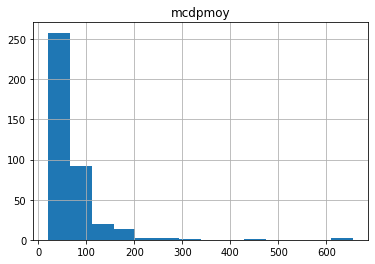

In [4]:
histo = df.hist(column='mcdpmoy',bins=14)

Histogramme des écarts même chanson dernier passage moyens

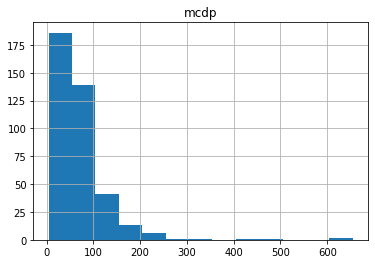

In [5]:
histo = df.hist(column='mcdp',bins=13)

Histogramme des écarts même chanson dernier passage même chanson moyens

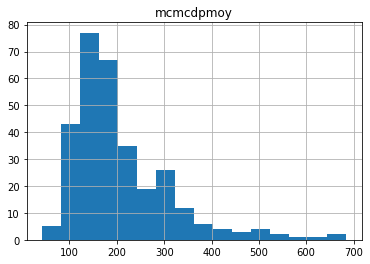

In [6]:
histo = df.hist(column='mcmcdpmoy',bins=16)

Histogramme des derniers écarts même chanson dernier passage même chanson

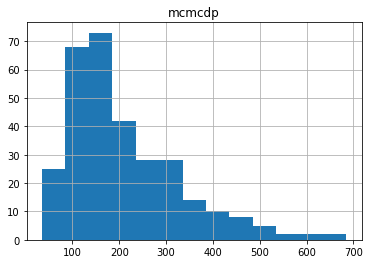

In [7]:
histo = df.hist(column='mcmcdp',bins=13)

Calcul des coefficients

In [8]:
histoMCDPmoy = util.histo(df['mcdpmoy'], 14)
valeursHistoMCDPmoy = util.getHistoValues(histoMCDPmoy)
histoMCDP = util.histo(df['mcdp'], 13)
valeursHistoMCDP = util.getHistoValues(histoMCDP)
histoMCMCDPmoy = util.histo(df['mcmcdpmoy'], 16)
valeursHistoMCMCDPmoy = util.getHistoValues(histoMCMCDPmoy)
histoMCMCDP = util.histo(df['mcmcdp'], 13)
valeursHistoMCMCDP = util.getHistoValues(histoMCMCDP)

In [9]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCDPmoy['classes'])
taille_ech = sum(valeursHistoMCDPmoy['hauteurs'])
df['f'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDate'][i] > valeursHistoMCDPmoy['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['f'][i] = valeursHistoMCDPmoy['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f
0,C'est écrit,Cabrel Francis,1989.0,3,119.500000,107.0,325.000000,210.0,173.0,66,0.032178
1,Si je m'en sors,Zenatti Julie,2000.0,4,49.250000,39.0,177.333333,63.0,214.0,175,0.004950
2,Du côté de chez Swann,Dave,1975.0,1,47.000000,47.0,NaN,NaN,32.0,431,0.670792
3,Yalla,Calogero,2004.0,2,34.500000,26.0,300.000000,300.0,65.0,166,0.670792
4,Je fais de toi mon essentiel,Le Roi Soleil,2005.0,3,61.000000,73.0,125.500000,177.0,166.0,93,0.032178
...,...,...,...,...,...,...,...,...,...,...,...
399,La peine maximum,Les Dix Commandements,2000.0,2,40.000000,34.0,488.000000,488.0,214.0,180,0.004950
400,Entre nous,Badi Chimène,2003.0,6,55.400000,52.0,112.000000,52.0,109.0,184,0.227723
401,Color Gitano,Girac Kendji,2014.0,2,42.000000,45.0,125.000000,125.0,131.0,86,0.049505
402,Maldonne,Zouk Machine,NaN,1,NaN,NaN,NaN,NaN,NaN,640,0.004950


In [10]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCDP['classes'])
taille_ech = sum(valeursHistoMCDP['hauteurs'])
df['g'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDate'][i] > valeursHistoMCDP['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['g'][i] = valeursHistoMCDP['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g
0,C'est écrit,Cabrel Francis,1989.0,3,119.500000,107.0,325.000000,210.0,173.0,66,0.032178,0.032178
1,Si je m'en sors,Zenatti Julie,2000.0,4,49.250000,39.0,177.333333,63.0,214.0,175,0.004950,0.014851
2,Du côté de chez Swann,Dave,1975.0,1,47.000000,47.0,NaN,NaN,32.0,431,0.670792,0.492574
3,Yalla,Calogero,2004.0,2,34.500000,26.0,300.000000,300.0,65.0,166,0.670792,0.344059
4,Je fais de toi mon essentiel,Le Roi Soleil,2005.0,3,61.000000,73.0,125.500000,177.0,166.0,93,0.032178,0.032178
...,...,...,...,...,...,...,...,...,...,...,...,...
399,La peine maximum,Les Dix Commandements,2000.0,2,40.000000,34.0,488.000000,488.0,214.0,180,0.004950,0.014851
400,Entre nous,Badi Chimène,2003.0,6,55.400000,52.0,112.000000,52.0,109.0,184,0.227723,0.101485
401,Color Gitano,Girac Kendji,2014.0,2,42.000000,45.0,125.000000,125.0,131.0,86,0.049505,0.101485
402,Maldonne,Zouk Machine,NaN,1,NaN,NaN,NaN,NaN,NaN,640,0.004950,0.004950


In [11]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCMCDPmoy['classes'])
taille_ech = sum(valeursHistoMCMCDPmoy['hauteurs'])
df['h'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDateMC'][i] > valeursHistoMCMCDPmoy['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['h'][i] = valeursHistoMCMCDPmoy['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h
0,C'est écrit,Cabrel Francis,1989.0,3,119.500000,107.0,325.000000,210.0,173.0,66,0.032178,0.032178,0.252475
1,Si je m'en sors,Zenatti Julie,2000.0,4,49.250000,39.0,177.333333,63.0,214.0,175,0.004950,0.014851,0.165842
2,Du côté de chez Swann,Dave,1975.0,1,47.000000,47.0,NaN,NaN,32.0,431,0.670792,0.492574,0.009901
3,Yalla,Calogero,2004.0,2,34.500000,26.0,300.000000,300.0,65.0,166,0.670792,0.344059,0.165842
4,Je fais de toi mon essentiel,Le Roi Soleil,2005.0,3,61.000000,73.0,125.500000,177.0,166.0,93,0.032178,0.032178,0.106436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,La peine maximum,Les Dix Commandements,2000.0,2,40.000000,34.0,488.000000,488.0,214.0,180,0.004950,0.014851,0.165842
400,Entre nous,Badi Chimène,2003.0,6,55.400000,52.0,112.000000,52.0,109.0,184,0.227723,0.101485,0.165842
401,Color Gitano,Girac Kendji,2014.0,2,42.000000,45.0,125.000000,125.0,131.0,86,0.049505,0.101485,0.106436
402,Maldonne,Zouk Machine,NaN,1,NaN,NaN,NaN,NaN,NaN,640,0.004950,0.004950,0.002475


In [12]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCMCDP['classes'])
taille_ech = sum(valeursHistoMCMCDP['hauteurs'])
df['i'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDateMC'][i] > valeursHistoMCMCDP['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['i'][i] = valeursHistoMCMCDP['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i
0,C'est écrit,Cabrel Francis,1989.0,3,119.500000,107.0,325.000000,210.0,173.0,66,0.032178,0.032178,0.252475,0.304455
1,Si je m'en sors,Zenatti Julie,2000.0,4,49.250000,39.0,177.333333,63.0,214.0,175,0.004950,0.014851,0.165842,0.183168
2,Du côté de chez Swann,Dave,1975.0,1,47.000000,47.0,NaN,NaN,32.0,431,0.670792,0.492574,0.009901,0.027228
3,Yalla,Calogero,2004.0,2,34.500000,26.0,300.000000,300.0,65.0,166,0.670792,0.344059,0.165842,0.183168
4,Je fais de toi mon essentiel,Le Roi Soleil,2005.0,3,61.000000,73.0,125.500000,177.0,166.0,93,0.032178,0.032178,0.106436,0.168317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,La peine maximum,Les Dix Commandements,2000.0,2,40.000000,34.0,488.000000,488.0,214.0,180,0.004950,0.014851,0.165842,0.183168
400,Entre nous,Badi Chimène,2003.0,6,55.400000,52.0,112.000000,52.0,109.0,184,0.227723,0.101485,0.165842,0.183168
401,Color Gitano,Girac Kendji,2014.0,2,42.000000,45.0,125.000000,125.0,131.0,86,0.049505,0.101485,0.106436,0.168317
402,Maldonne,Zouk Machine,NaN,1,NaN,NaN,NaN,NaN,NaN,640,0.004950,0.004950,0.002475,0.004950


In [13]:
df['score'] = df['f']*df['g']*df['h']*df['i']*10000
df

,titre,artiste,année,nbpassages,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i,score
0,C'est écrit,Cabrel Francis,1989.0,3,119.500000,107.0,325.000000,210.0,173.0,66,0.032178,0.032178,0.252475,0.304455,0.795915
1,Si je m'en sors,Zenatti Julie,2000.0,4,49.250000,39.0,177.333333,63.0,214.0,175,0.004950,0.014851,0.165842,0.183168,0.022334
2,Du côté de chez Swann,Dave,1975.0,1,47.000000,47.0,NaN,NaN,32.0,431,0.670792,0.492574,0.009901,0.027228,0.890737
3,Yalla,Calogero,2004.0,2,34.500000,26.0,300.000000,300.0,65.0,166,0.670792,0.344059,0.165842,0.183168,70.107609
4,Je fais de toi mon essentiel,Le Roi Soleil,2005.0,3,61.000000,73.0,125.500000,177.0,166.0,93,0.032178,0.032178,0.106436,0.168317,0.185498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,La peine maximum,Les Dix Commandements,2000.0,2,40.000000,34.0,488.000000,488.0,214.0,180,0.004950,0.014851,0.165842,0.183168,0.022334
400,Entre nous,Badi Chimène,2003.0,6,55.400000,52.0,112.000000,52.0,109.0,184,0.227723,0.101485,0.165842,0.183168,7.020253
401,Color Gitano,Girac Kendji,2014.0,2,42.000000,45.0,125.000000,125.0,131.0,86,0.049505,0.101485,0.106436,0.168317,0.900048
402,Maldonne,Zouk Machine,NaN,1,NaN,NaN,NaN,NaN,NaN,640,0.004950,0.004950,0.002475,0.004950,0.000003


In [14]:
df = df.sort_values(by='score', ascending=False)
df.to_csv('test.csv', sep=";", encoding='utf8')
# np.where(df['titre'] == 'Ça fait mal')[0][0]
